## Lab 4 - part 2: Data Weights and Autocorellation

**TU Delft and WUR**<br>
**Q1 2024**<br>
**Instructor:** Theodoros Chatzivasileiadis <br>
**Instructor:** Hans Hoogenboom <br>
**TA:** Ka Yi Chua <br>
**[Metropolitan Data 1](https://jhoogenboom.github.io/spatial-data-science/_index.html)** <br>



## Exercise 4a: Spatial Autocorrelation and ESDA 

USE the Liverpool IMD data we have been using in previous sessions. This will require you to:

* Load up the IMD dataset for Liverpool.
* Create a choropleth of the `imd_score` variable.
* Compute the spatial weights matrix for the LSOAs. Think of one criterium to build it that you think would fit this variable (e.g. contiguity, distance-based, etc.), and apply it.
* Create the standardized version of the IMD scores.
* Calculate the spatial lag of the standardized scores.
* Create the Moran Plot.
* Calculate the value of Moran's I as well as its significance level.
* Perform a LISA analysis and generate a map of the results. What are the main patterns?

In [117]:
import seaborn as sns
import pandas as pd
import pysal as ps
from pysal.lib import weights
from libpysal.io import open as psopen
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

imd_shp = "D:/AMS/Metropolitan Data 1/lab-04/data/Index_of_Multiple_Deprivation_IMD_E08000012"
lookup_path = "D:/AMS/Metropolitan Data 1/lab-04/data/Index_of_Multiple_Deprivation_IMD_E08000012"



For this part I would like you to experiment with Data from Amstedam. However this will require you to find the dataset yourself!

## Question 1: Building a Contiguity-Based Weight Matrix

Use PySAL to create a contiguity-based weight matrix (W) for a given spatial dataset of polygons. Write a function create_contiguity_weights that:

    Reads in a shapefile of polygons.
    Constructs a Queen contiguity-based spatial weights matrix.
    Returns the weight matrix.


In [77]:
import seaborn as sns
import pysal as ps
from pysal.lib import weights
from libpysal.io import open as psopen
import numpy as np
import matplotlib.pyplot as plt
import osmnx as ox  
import geopandas as gpd  
import pandas as pd  
import matplotlib  

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   GUID        636 non-null    object  
 1   SPORTPARK   636 non-null    object  
 2   FUNCTIONEE  636 non-null    object  
 3   OBJECTTYPE  636 non-null    object  
 4   TYPE_OBJEC  629 non-null    object  
 5   VELD_INDEL  634 non-null    object  
 6   JAAR_VAN_A  636 non-null    float64 
 7   SPORTFUNCT  635 non-null    object  
 8   MATERIAAL   627 non-null    object  
 9   OMTREK_GIS  636 non-null    float64 
 10  OPPERVLAKT  636 non-null    float64 
 11  geometry    636 non-null    geometry
dtypes: float64(3), geometry(1), object(8)
memory usage: 59.8+ KB


c:\Users\Aamor\AppData\Local\Programs\Python\Python312\Lib\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 446 disconnected components.
 There are 340 islands with ids: {F161AD0A-399D-4CCD-8E7E-ADBBE9CCAFB6}, {A422479A-24BD-4566-89F4-30D07091A2CA}, {9991F3F0-214A-4423-A7B1-EE02DA16CBF0}, {E048E5E2-DE58-454D-AA39-E255D5D194C9}, {5C280F7C-C064-4F8D-8F81-29AB8EA8D350}, {B37D32AB-BEF6-4210-9EF0-E7F160A1B152}, {C696C291-3C9D-4E7D-9146-5E903F466B8A}, {9453F2E7-14DA-48E3-80E3-A62995E0ECFF}, {B5223944-E3FF-44C2-A38F-DFE83F9239D6}, {E31C20F1-5B11-4235-A997-B64BC2B36B85}, {D6276427-8895-4FB0-A299-4E8E864DEAB8}, {939952B1-2694-418F-A52D-8A099BF46EBA}, {8F6E34DE-535D-4668-ACB7-265C27E13B4B}, {FC561271-1C1C-40BD-8487-642B2991A452}, {EB9A9BFC-A44A-4007-8331-B7EFE188C966}, {66BF7067-5976-475C-AAB7-5EB67B7947A1}, {736C9EDA-0ECC-444B-BF98-386231DB1384}, {160F4BE4-D3A4-40E6-B0B6-4CC0949FF120}, {DB134253-7A08-4A18-9960-C21D70EB71DA}, {

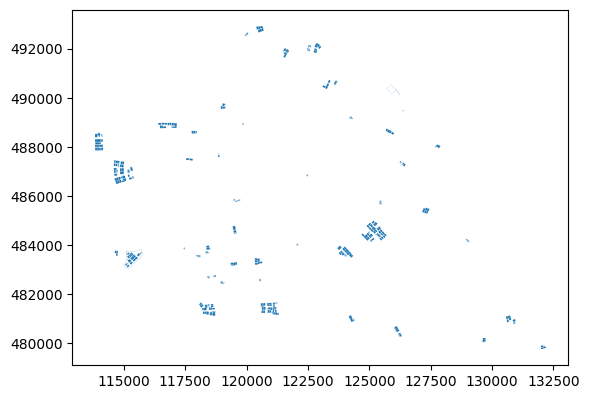

In [123]:
def create_contiguity_weights(shapefile_path, id_column):
    # reading in a shapefile of polygons
    imd = gpd.read_file(shapefile_path)
    imd.info()
    imd.plot()
  
    # constructing a Queen contiguity-based spatial weights matrix.
    w_queen = weights.Queen.from_dataframe(imd, ids=id_column)

    # return the weight matrix
    return w_queen

shapefile_path = 'AMS/Sportvelden 05122019.shp'
id_column = "GUID"

w_queen = create_contiguity_weights(shapefile_path, id_column)
w_queen

In [124]:
print(imd.head())

                                     GUID                      SPORTPARK  \
0  {E3710BD2-A5E2-48A6-8486-B9B3F8E18FC8}  Sportpark Middenmeer-Voorland   
1  {F161AD0A-399D-4CCD-8E7E-ADBBE9CCAFB6}  Sportpark Middenmeer-Voorland   
2  {7EFD6D90-A589-47EF-9E9B-60178BF50C56}  Sportpark Middenmeer-Voorland   
3  {A422479A-24BD-4566-89F4-30D07091A2CA}  Sportpark Middenmeer-Voorland   
4  {9991F3F0-214A-4423-A7B1-EE02DA16CBF0}  Sportpark Middenmeer-Voorland   

                         FUNCTIONEE            OBJECTTYPE  \
0  Sportpark Middenmeer-Voorland 02  Sportveld (begroeid)   
1  Sportpark Middenmeer-Voorland 02  Sportveld (begroeid)   
2  Sportpark Middenmeer-Voorland 02  Sportveld (begroeid)   
3  Sportpark Middenmeer-Voorland 02  Sportveld (begroeid)   
4  Sportpark Middenmeer-Voorland 04  Sportveld (begroeid)   

               TYPE_OBJEC   VELD_INDEL  JAAR_VAN_A       SPORTFUNCT MATERIAAL  \
0  Gras- en kruidachtigen  SPO-MIDD-15      2012.0  Honkbal/softbal      Gras   
1  Gras- en kr


## Question 2: Calculating Moran’s I

Write a function calculate_morans_i that:

    Takes a spatial weight matrix W and an attribute array y.
    Calculates Moran’s I for the given attribute array.
    Returns the Moran’s I value and its p-value.


Moran's I: 0.3513929553816942
p-value: 0.001


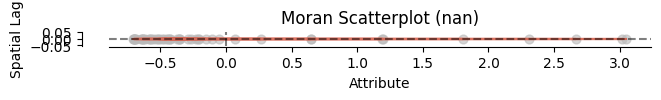

In [79]:
%matplotlib inline

from pysal.explore import esda
from esda import Moran 
from splot.esda import moran_scatterplot, lisa_cluster, plot_local_autocorrelation
import contextily as ctx


def calculate_morans_i(W, y):  
 
    
    # Calculate Moran's I  
    mi = esda.Moran(y, W)  
    
    # Get Moran's I value and p-value  
    morans_i_value = mi.I  
    morans_i_p_value = mi.p_sim  

    return morans_i_value, morans_i_p_value  
 
imd = gpd.read_file(shapefile_path)
y_values = imd['OPPERVLAKT'].values  

morans_i_value, morans_i_p_value = calculate_morans_i(w_queen, y_values) 

print("Moran's I:", morans_i_value)  
print("p-value:", morans_i_p_value)

moran_scatterplot(mi);




## Question 3: Standardizing Spatial Weight Matrices

Create a function standardize_weights that:

    Takes a spatial weight matrix W.
    Standardizes it so that the weights of each row sum to one.
    Returns the standardized weight matrix.


In [104]:
w_queen['{E3710BD2-A5E2-48A6-8486-B9B3F8E18FC8}']
w_queen.transform
w_queen.transform = 'O'
w_queen['{E3710BD2-A5E2-48A6-8486-B9B3F8E18FC8}']

{'{7EFD6D90-A589-47EF-9E9B-60178BF50C56}': 1.0}

In [96]:
def standardize_weights(w):
    w.transform = 'R'  
    return w

# Standardize weights  
standardized_w_queen = standardize_weights(w_queen)

# Check the standardized weights for a specific observation  
print(standardized_w_queen['{E3710BD2-A5E2-48A6-8486-B9B3F8E18FC8}'])  

# Verify that the sum of the weights is approximately 1  
print("Sum of standardized weights:", pd.Series(standardized_w_queen['{E3710BD2-A5E2-48A6-8486-B9B3F8E18FC8}']).sum())


{'{7EFD6D90-A589-47EF-9E9B-60178BF50C56}': 1.0}
Sum of standardized weights: 1.0



## Question 4: Creating Distance-Based Weights

Write a function create_distance_weights that:

    Takes a set of point coordinates and a threshold distance.
    Constructs a distance-based spatial weight matrix where all points within the threshold distance are assigned a weight.
    Returns the weight matrix.


In [113]:
def create_distance_weights(imd, threshold_distance):  
  
    
    # Create a DistanceBand weights object using the dataframe and the threshold distance  
    distance_weights = weights.DistanceBand.from_dataframe(imd, threshold_distance, binary=False)  
    
    return distance_weights


threshold_distance = 10000  

# Output the weights to see which points have been assigned weights  
print("Distance-based weights (non-binary):")  
print(distance_weights) 

Distance-based weights (non-binary):



## Question 5: Visualizing a Moran Plot

Using PySAL, write a function plot_moran that:

    Takes a spatial weights matrix W and an attribute array y.
    Creates and displays a Moran plot for the attribute.
    Saves the Moran plot as an image file.

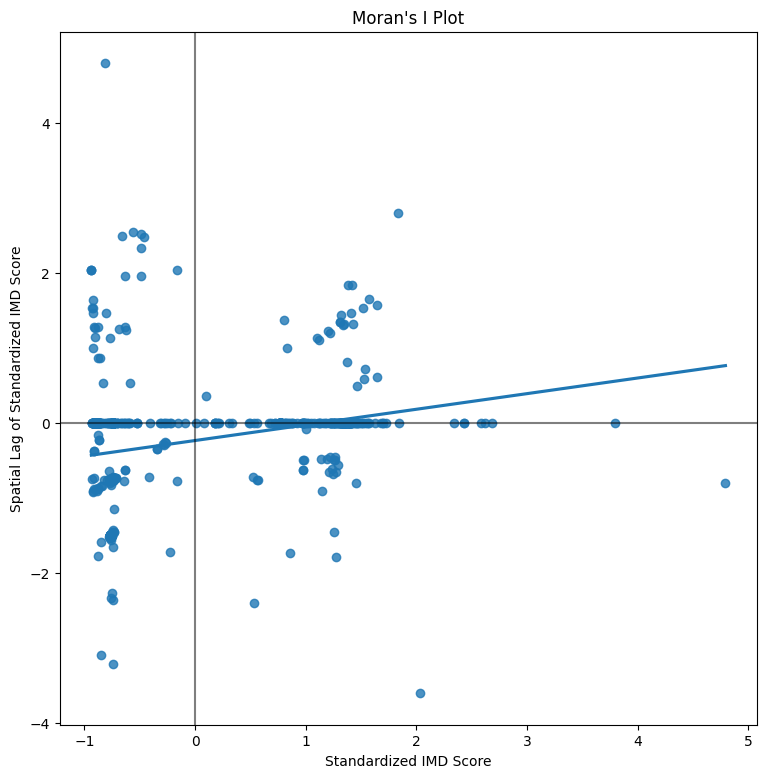

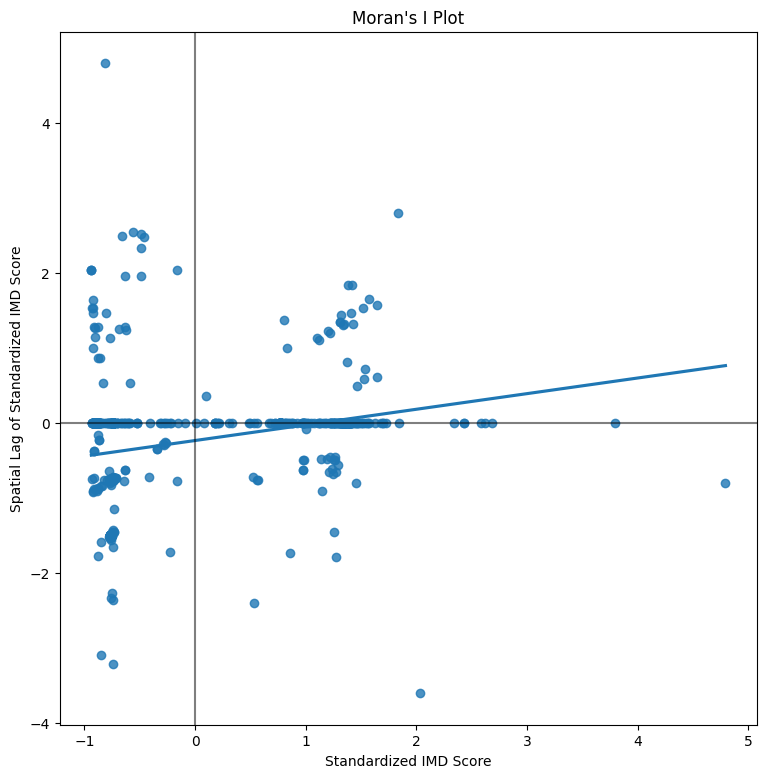

In [126]:
def plot_moran(W, y, output_file='moran_plot.png'):

  # Standardize the IMD scores  
    std_imd = (imd['OPPERVLAKT'] - imd['OPPERVLAKT'].mean()) / imd['OPPERVLAKT'].std()  
    
    # Compute the spatial lag of the standardized version  
    std_w_imd = pd.Series(weights.lag_spatial(w_queen, std_imd), index=std_imd.index)  
    
    # Setup the figure and axis for the Moran plot  
    f, ax = plt.subplots(1, figsize=(9, 9))  
    
    # Plot values for the Moran plot  
    sns.regplot(x=std_imd, y=std_w_imd, ax=ax, ci=None)  
    
    # Add vertical and horizontal lines  
    plt.axvline(0, c='k', alpha=0.5)  
    plt.axhline(0, c='k', alpha=0.5)  

    # Set labels and title 
    
    ax.set_xlabel
    ax.set_ylabel  
    plt.title("Moran's I Plot")  

    # Display the Moran plot  
    plt.show()  
    
    # Save the plot as an image file  
    plt.savefig(output_file)  
    plt.close()
    
 
plot_moran(imd, w_queen, output_file='moran_plot.png') 
plot_moran(imd, w_queen, output_file='moran_plot.png') 